In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

reddit_data_path = '/content/drive/MyDrive/data/reddit_data.csv'

df = pd.read_csv(reddit_data_path)


print("Reddit Data Sample:")
df = df[['text', 'topic']].dropna()
df['topic'].value_counts()
df

Reddit Data Sample:


,text,topic
0,Thanks! Not sure if those links were up there ...,pcmasterrace
1,I think its unlikely someone would kill them s...,news
2,Hoult is another one that's important.\n\nBut ...,movies
3,Can have my opinion.\n\nThey're noisy and hot....,pcmasterrace
4,Nice! That reminds me of a more recent article...,news
...,...,...
39996,But aren't most of the illegal immigrants Cath...,news
39997,Yes because she held him down and forced the c...,news
39998,Six String Samurai is one of my favorite movie...,movies
39999,nah this is the kind of comments you get when ...,nfl


In [4]:
# dataset imbalanced dakhacche. needs to put equal number of types with max length of string size
df1 = df[df['topic']=='nfl']
df1.sort_values(by="text", key=lambda x: x.str.len(),ascending=False,inplace=True)
df2 = df[df['topic']=='news']
df2.sort_values(by="text", key=lambda x: x.str.len(),ascending=False,inplace=True)
df3 = df[df['topic']=='pcmasterrace']
df3.sort_values(by="text", key=lambda x: x.str.len(),ascending=False,inplace=True)
df4 = df[df['topic']=='movies']
df4.sort_values(by="text", key=lambda x: x.str.len(),ascending=False,inplace=True)
df5 = df[df['topic']=='relationships']
df5.sort_values(by="text", key=lambda x: x.str.len(),ascending=False,inplace=True)
print(df5)

                                                    text          topic
26523  Oh **hell** no.  I'm a bleeding heart for anim...  relationships
28374  You need to sit and wait for the anger--the br...  relationships
38734  Omg I am so very sorry for your husband.  I'm ...  relationships
18532  &gt;a good feminist \n\nHow is he a good femin...  relationships
38911  I'm sorry.  Honestly, someone with trust issue...  relationships
...                                                  ...            ...
20989                                              No.    relationships
7270                                               Yup!   relationships
32849                                               wtf   relationships
11457                                                :)   relationships
33289                                                :(   relationships

[4170 rows x 2 columns]


<ipython-input-4-21f76d040a15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(by="text", key=lambda x: x.str.len(),ascending=False,inplace=True)
<ipython-input-4-21f76d040a15>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values(by="text", key=lambda x: x.str.len(),ascending=False,inplace=True)
<ipython-input-4-21f76d040a15>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.sort_values(by="text", key=la

In [5]:
df4[:4170]

,text,topic
37117,"Yeah, its some god damned bullshit. Disney is ...",movies
10114,"Goodfellas. Sid Vicious singing ""my way"" and j...",movies
5456,"I would normally say ""account for inflation!"" ...",movies
36696,"My David CHOO CHOO , To the top the post goes ...",movies
8265,"I always liked his writing, and never had anyt...",movies
...,...,...
9691,*Hey Joka! I'm onna tapa youah cah!* Batman w...,movies
37651,That sounds utterly revolting to me.\n\nWhat d...,movies
9840,"No, the score is usually composed and recorded...",movies
18313,Are you having a contest for how many times yo...,movies


In [6]:
reddit_df = pd.concat([df1[:4170],df2[:4170],df3[:4170],df4[:4170],df5[:4170]],ignore_index=True)

In [7]:
reddit_df = reddit_df.sample(frac=1.0, random_state=42).dropna()
reddit_df.reset_index(drop=True, inplace=True)
print(reddit_df)


                                                    text          topic
0      He texted me today and I ignored him. :) as sa...  relationships
1      Yes, OP has responded that he doesn't think sh...  relationships
2      Yeah. with [GeDoSaTo](http://blog.metaclassofn...   pcmasterrace
3      You can't argue with a 14 y/o that thinks he k...           news
4      No, I blame David Koresh and the religious fan...           news
...                                                  ...            ...
20845  #ROW ROW FIGHT THE POWER!\n\nAND USE MY PITCHF...   pcmasterrace
20846  What would be a better alternative, though? I ...   pcmasterrace
20847  At the same time more homicides are by black m...           news
20848  you're not. i giggled at that too. he got benc...            nfl
20849  I thought it was better than the book. It gain...         movies

[20850 rows x 2 columns]


In [8]:
reddit_df.iloc[4]

text     No, I blame David Koresh and the religious fan...
topic                                                 news
Name: 4, dtype: object

In [9]:

duplicate_count = reddit_df.duplicated().sum()

reddit_df = reddit_df.drop_duplicates()

unique_entries_count = reddit_df.shape[0]

print(f"Total entries before removing duplicates: {unique_entries_count + duplicate_count}")
print(f"Duplicate entries found: {duplicate_count}")
print(f"Total unique entries after removing duplicates: {unique_entries_count}")


Total entries before removing duplicates: 20850
Duplicate entries found: 19
Total unique entries after removing duplicates: 20831


In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
        preprocessed_text = ' '.join(filtered_tokens)
        return preprocessed_text
    else:
        return ''

reddit_df['text'] = reddit_df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
reddit_df['topic'].value_counts()

news             4170
relationships    4168
nfl              4168
pcmasterrace     4163
movies           4162
Name: topic, dtype: int64

In [12]:
reddit_df.shape

(20831, 2)

In [13]:
# Used stemming here.
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
reddit_df['text'] = reddit_df['text'].apply(lambda text: ' '.join([stemmer.stem(word) for word in text.split()]))


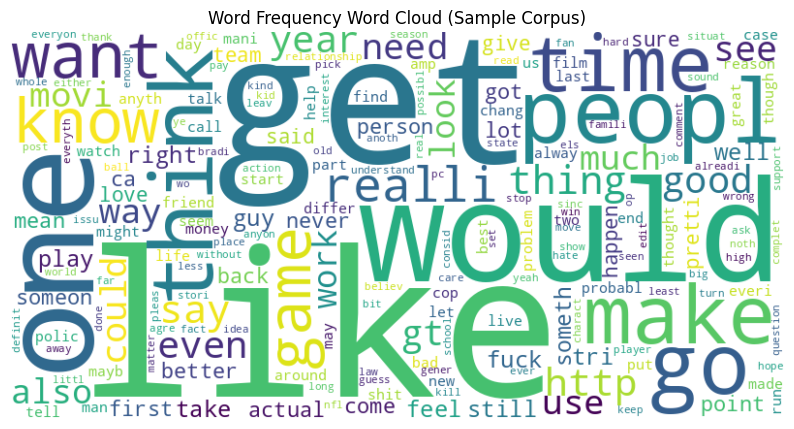

In [26]:
# visualizing frequency of words
import re
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

corpus = reddit_df.text.tolist()[:]
words = re.findall(r'\b\w+\b', ' '.join(corpus).lower())
word_freq = Counter(words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Frequency Word Cloud (Sample Corpus)")
plt.show()

In [27]:
len(word_freq.items())

29631

In [28]:
# Etto boro vocablist. katchat kora dorkar
# 24 percent shamner theke 24 percent pechon theke bad dite hbe jodi vocab komaite chai
def tokenize(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return words
def zipfs_law_filter(word_freq):
    total_words = len(word_freq)
    kp = 5
    kp1 = 35
    cutoff1 = int((kp/100) * total_words)
    cutoff2 = int((kp/100) * total_words)
    word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
    most_frequent_words = list(word_freq.keys())[:cutoff1]
    least_frequent_words = list(word_freq.keys())[-cutoff2:]
    word_freq = {word: count for word, count in word_freq.items() if word not in least_frequent_words and word not in most_frequent_words}
    return word_freq

word_freq = zipfs_law_filter(word_freq)

In [29]:
len(word_freq)

26669

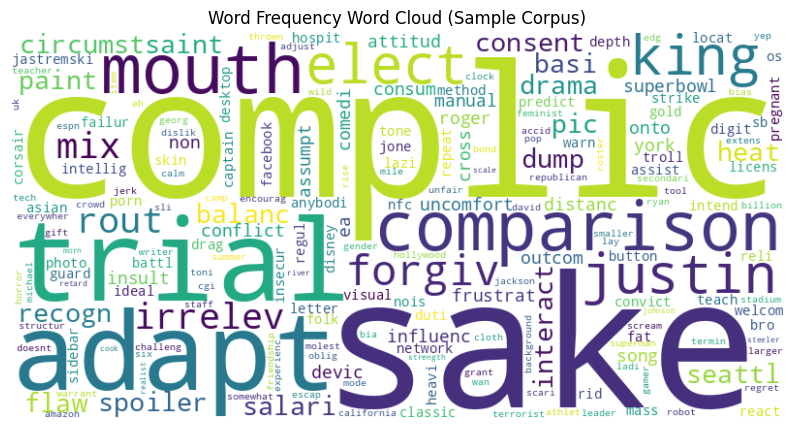

In [30]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Frequency Word Cloud (Sample Corpus)")
plt.show()

In [31]:
reddit_df['text'] = reddit_df['text'].apply(lambda text: ' '.join([word for word in text.split() if word in word_freq]))


In [32]:
len(word_freq)

26669

# Nicely Explained https://www.youtube.com/watch?v=zLMEnNbdh4Q

In [33]:
term_fin = set(word_freq)

In [34]:
reddit_df = reddit_df[reddit_df['text'].str.len() > 0]
reddit_df.shape

(19861, 2)

In [35]:
reddit_df.reset_index(drop=True, inplace=True)


In [36]:
from tqdm import tqdm
import numpy as np
import re
mat = []
for text in tqdm(reddit_df['text'], total=len(reddit_df)):
    words = text.split()
    tf_per_doc = []
    total_words = len(words)
    for term in word_freq:
        term_count = words.count(term)
        tf_per_doc.append(term_count/total_words)
    mat.append(tf_per_doc)
tf_mat = np.array([list(row) for row in zip(*mat)])

100%|██████████| 19861/19861 [04:25<00:00, 74.88it/s]


In [37]:
tf_mat.shape

(26669, 19861)

In [38]:
import math
num_of_docs = len(reddit_df)
corpus_of_txt = reddit_df.text.tolist()
idf_mat = []
for word in word_freq:
    txt_in_total_docs = sum(1 for sentence in corpus_of_txt if word in sentence)
#     print(txt_in_total_docs)
    idf_mat.append(math.log10(num_of_docs/txt_in_total_docs))
idf_mat = np.array(idf_mat)

In [39]:
idf_mat.shape

(26669,)

In [40]:
tf_idf = np.empty(tf_mat.shape)
for i in range(tf_mat.shape[0]):
    tf_idf[i, :] = tf_mat[i, :] * idf_mat[i]

In [41]:
tf_idf.shape

(26669, 19861)

In [42]:
tf_idf = tf_idf.T

In [43]:
tf_idf.shape

(19861, 26669)

In [44]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tf_idf)
cluster_assignments = kmeans.labels_
# from sklearn.metrics import adjusted_rand_score
# ari = adjusted_rand_score(y_train, cluster_assignments)
# print(f"Adjusted Rand Index (ARI): {ari}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
from sklearn.metrics import adjusted_rand_score
y = reddit_df.topic.tolist()
reddit_df['cluster'] = cluster_assignments

In [46]:
d = {
       'text':reddit_df['text'].tolist(),
       'topic':reddit_df['topic'].tolist(),
       'cluster':reddit_df['cluster'].tolist()
}
df = pd.DataFrame(d)

In [47]:
df['cluster'].shape

(19861,)

In [48]:
df['cluster'].value_counts()

4    19784
1       63
0       10
2        3
3        1
Name: cluster, dtype: int64

In [49]:
import numpy as np
num_clusters = 5
cluster_assignments = df['cluster']
cluster_centroids = []
for cluster_id in range(5):
    cluster_points = tf_idf[cluster_assignments == cluster_id]
    centroid = np.mean(cluster_points, axis=0)
    cluster_centroids.append(centroid)
davies_bouldin_index = 0
for i in range(5):
    max_similarity = 0

    for j in range(5):
        if i != j:
            similarity = np.linalg.norm(cluster_centroids[i] - cluster_centroids[j]) / (
                        np.std(tf_idf[cluster_assignments == i]) + np.std(
                    tf_idf[cluster_assignments == j]))
            if max_similarity < similarity:
                max_similarity = similarity

    davies_bouldin_index += max_similarity
davies_bouldin_index /= num_clusters

print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 113.34301158701426


In [50]:
from collections import Counter
cluster_assignments = df['cluster']
true_labels = df['topic']

def calculate_purity(cluster_assignments, true_labels):
    num_samples = len(cluster_assignments)
    purity = 0
    for cluster_id in np.unique(cluster_assignments):
        cluster_indices = np.where(cluster_assignments == cluster_id)[0]
        cluster_label_counts = Counter(true_labels[cluster_indices])
        majority_class = cluster_label_counts.most_common(1)[0][0]
        majority_count = cluster_label_counts[majority_class]
        purity += majority_count
    purity /= num_samples
    return purity

purity_score = calculate_purity(cluster_assignments, true_labels)
print(f"Purity: {purity_score}")

Purity: 0.2095564170988369


In [51]:
clustr = pd.DataFrame({'cluster':df.cluster.tolist()})

In [52]:
clustr.shape

(19861, 1)

In [53]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
num_samples = 1000
random_indexes = np.random.choice(df.index[:5000], num_samples, replace=False)
subset_data = tf_idf[random_indexes]
subset_assignments = df['cluster'][random_indexes]
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(subset_data)



In [55]:
df = pd.DataFrame({
    'x': tsne_results[:, 0],
    'y': tsne_results[:, 1],
    'z': tsne_results[:, 2],
    'cluster':subset_assignments.tolist()
})

fig = go.Figure()

centroids = []
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    centroid = cluster_data[['x', 'y', 'z']].mean().values
    centroids.append(centroid)

centroids = np.array(centroids)

print(centroids)

[[  0.26467192   1.1389958    0.7327874 ]
 [  7.9910073  -17.844751   -41.2584    ]
 [-37.231144   -18.452013    84.712425  ]]


In [56]:
cluster_colors = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'purple',
    4: 'orange',
}

marker_size = 4

for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['x'],
        y=cluster_data['y'],
        z=cluster_data['z'],
        mode='markers',
        marker=dict(
            size=marker_size,
            opacity=0.6,
            color=cluster_colors[cluster],
        ),
        name=f'Cluster {cluster}'
    ))

centroid_marker_size = 10
for cluster in df['cluster'].unique():
    centroid = centroids[cluster]
    fig.add_trace(go.Scatter3d(
        x=[centroid[0]],
        y=[centroid[1]],
        z=[centroid[2]],
        mode='markers',
        marker=dict(
            size=centroid_marker_size,
            opacity=1.0,
            symbol='cross',
            color=cluster_colors[cluster],
        ),
        name=f'Centroid {cluster}'
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)
fig.show()

IndexError: ignored